# Load Libraries

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 161 µs (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
%matplotlib inline

time: 4.16 ms (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
import os
import glob
import json
from tqdm import tqdm
import pandas as pd


from PIL import Image
import imagesize


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
from IPython.display import display

time: 371 ms (started: 2022-01-06 19:23:53 +00:00)


# Variables

## Paths

In [ ]:
root_dir ='/content/drive/MyDrive/Projet datascientest/'
raw_data_dir = root_dir + 'RAW DATA/'
images_dir = raw_data_dir + 'IMAGES/'
json_dir = raw_data_dir + 'JSON/'

time: 2.06 ms (started: 2022-01-06 19:23:53 +00:00)


## Other

In [ ]:
rebuild_database = False # will reread each file if true (very long via colab=> a faire en local de preference) 

time: 1.13 ms (started: 2022-01-06 19:23:53 +00:00)


# Load Data

## Images

In [ ]:
if rebuild_database:
  # list all year directories
  year_dirs = [f.path for f in os.scandir(images_dir) if f.is_dir()]
  # loop to get a csv per year 
  for year_dir in year_dirs:
    year = year_dir[-4:]
    csv_path = root_dir + year + '.csv'
    img_dict = {}
    for path, subdirs, files in tqdm(os.walk(year_dir)):
          for name in files:
              file_path = os.path.join(path, name) # get path
              resolution= (imagesize.get(file_path)) # get res
              img_dict[name]= [file_path,resolution] #append to dict
          # create df and save to not redo each time
          img_lst_df = pd.DataFrame.from_dict(img_dict, orient='index',columns=["file_path","resolution"])
          img_lst_df['file_year'] = year
          img_lst_df.to_csv(csv_path)


time: 12 ms (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
if rebuild_database:
  # laod and concat csv per year 
  csv_files = [root_dir + str(year) + '.csv' for year in range(2006,2017) if os.path.exists(root_dir + str(year) + '.csv')]
  dfs_ = []
  for filename in csv_files:
      df = pd.read_csv(filename, index_col=None, header=0)
      dfs_.append(df)
  img_lst_df = pd.concat(dfs_, axis=0, ignore_index=True)
  # extract iamge_id and format 
  img_lst_df.rename(columns={img_lst_df.columns[0]: "file_name"}, inplace=True)
  img_lst_df[['image_id', 'format']] = img_lst_df['file_name'].str.split('.', 1, expand=True)
  # display(img_lst_df.head())

time: 9.65 ms (started: 2022-01-06 19:23:53 +00:00)


## Json

In [ ]:
if rebuild_database:
  json_pattern = os.path.join(json_dir, '*.json')
  file_list = glob.glob(json_pattern)

  json_dfs = []
  for file in file_list:
      with open(file) as f:
          json_data = pd.json_normalize(json.loads(f.read()))
          json_data['json_file'] = file.rsplit("/", 1)[-1]
      json_dfs.append(json_data)
  json_df = pd.concat(json_dfs)

time: 6.17 ms (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
 # create df and save to not redo each time 
if rebuild_database:
  json_df.to_csv(path_or_buf=root_dir + 'json_data.csv',index=False)

time: 1.73 ms (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
# load csv 
if rebuild_database:
  json_lst_df = pd.read_csv(root_dir + 'json_data.csv')
  json_lst_df

time: 1.97 ms (started: 2022-01-06 19:23:53 +00:00)


## Join

In [ ]:
## join to get only file present in image dir and json files 
if rebuild_database:
  json_lst_df['image_id'] = json_lst_df['image_id'].astype(str)
  df = img_lst_df.merge(json_lst_df, how='inner', on='image_id')
  df.head()

time: 3.04 ms (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
if rebuild_database:
  # save final df for EDA
  df.to_csv(path_or_buf=root_dir + 'image_and_json_data.csv',index=False)

time: 2.09 ms (started: 2022-01-06 19:23:53 +00:00)


In [ ]:
# load final database
df =  pd.read_csv(root_dir + 'image_and_json_data.csv')

time: 3.85 s (started: 2022-01-06 19:23:53 +00:00)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA

## File related

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


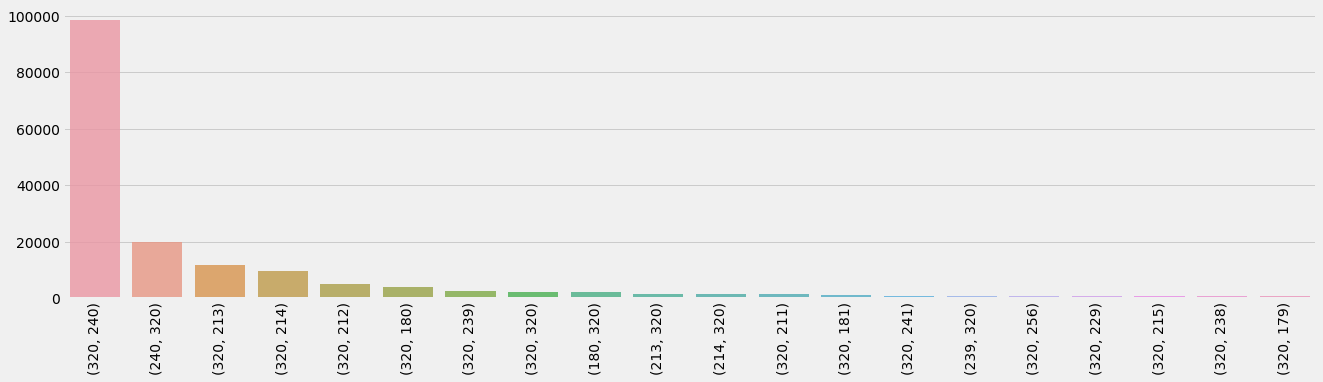

time: 485 ms (started: 2022-01-06 19:23:57 +00:00)


In [ ]:
res_count = df['resolution'].value_counts()[:20]

plt.figure(figsize=(20,5))
sns.barplot(res_count.index, res_count.values, alpha=0.8)
plt.xticks(rotation=90);

In [ ]:
format_count = df['format'].value_counts()
format_count

jpg    215410
Name: format, dtype: int64

time: 29.5 ms (started: 2022-01-06 19:23:58 +00:00)


## Mushroom related

Class > Order > Family > Species 

cf https://www.mushroomexpert.com/taxonomy.html

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215410 entries, 0 to 215409
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   file_name                 215410 non-null  object 
 1   file_path                 215410 non-null  object 
 2   resolution                215410 non-null  object 
 3   file_year                 215410 non-null  int64  
 4   image_id                  215410 non-null  int64  
 5   format                    215410 non-null  object 
 6   observation               215410 non-null  object 
 7   label                     215410 non-null  object 
 8   image_url                 215410 non-null  object 
 9   user                      215410 non-null  object 
 10  date                      215410 non-null  object 
 11  thumbnail                 215410 non-null  int64  
 12  location                  215408 non-null  object 
 13  gbif_info.kingdom         204271 non-null  o

In [ ]:
def plot_fig():
  fig = plt.figure(figsize=(20,5))
  sns.barplot(x=val_count.index,y= val_count.values, alpha=0.8)
  plt.xticks(rotation=90);
  plt.title('Number of images per.{}'.format(val_count.name))
  plt.close()
  return fig

time: 4.72 ms (started: 2022-01-06 19:44:14 +00:00)


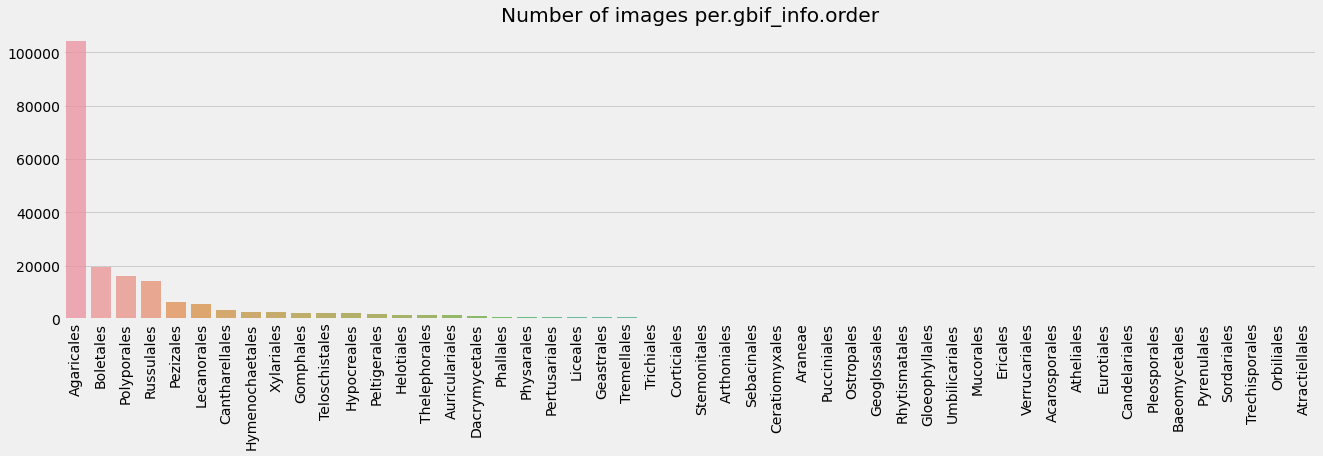

------------------------------------------------------------------------------------------------------------------------------------------------------


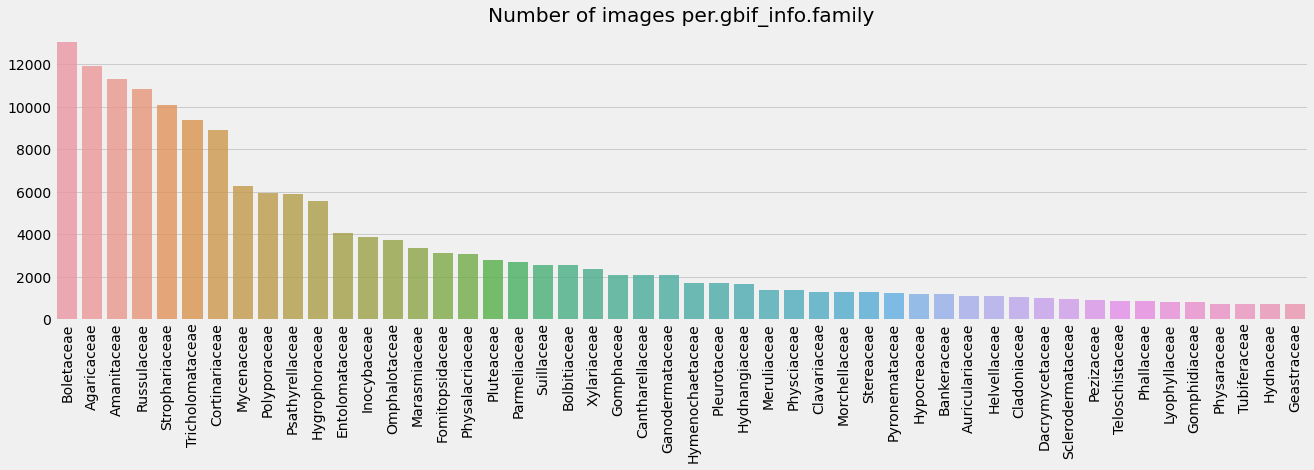

------------------------------------------------------------------------------------------------------------------------------------------------------


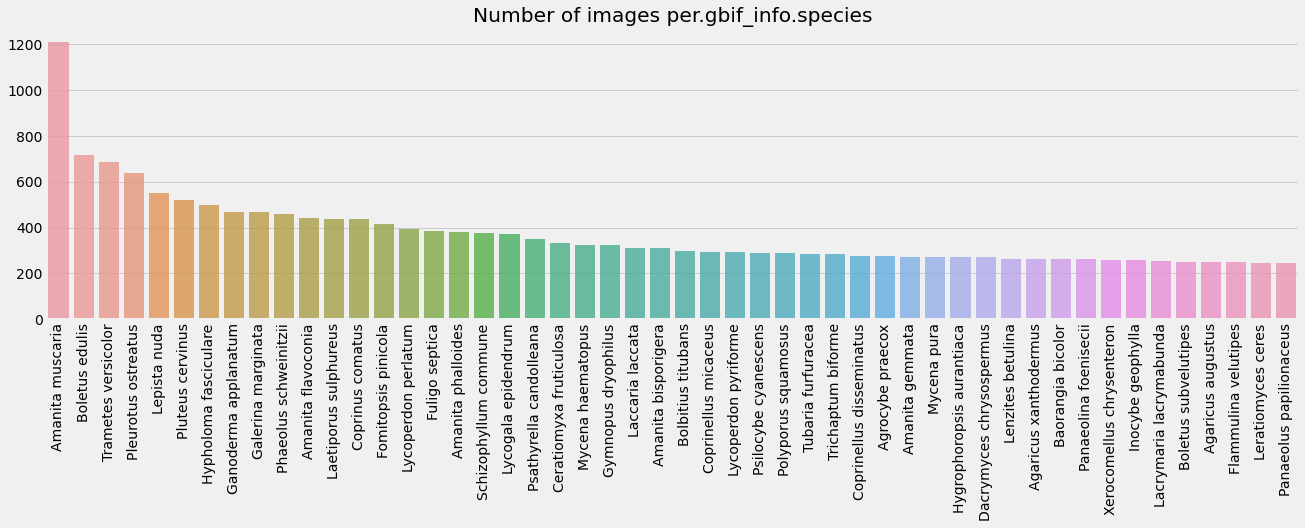

------------------------------------------------------------------------------------------------------------------------------------------------------
time: 2.25 s (started: 2022-01-06 19:44:56 +00:00)


In [ ]:
for col in ['gbif_info.order','gbif_info.family','gbif_info.species']:
  val_count = df[col].value_counts()[:50]
  fig = plot_fig()
  display(fig)
  print('-'*150)

# TO DO 

* Flag reread image & rebuild_db

* image to array 
  *   https://stackoverflow.com/questions/44078327/fastest-approach-to-read-thousands-of-images-into-one-big-numpy-array
  *   https://www.kaggle.com/zayon5/image-classification-dog-and-cat-images
  *   https://thecleverprogrammer.com/2021/06/08/convert-image-to-array-using-python/

* 

